# This notebook gets the results from the DB to process into histograms and others

In [7]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def connection(user,passwd,dbname, echo_i=False):
    str1 = ('postgresql+pg8000://' + user +':' + passw + '@switch-db2.erg.berkeley.edu:5433/' 
            + dbname + '?ssl=true&sslfactory=org.postgresql.ssl.NonValidatingFactory')
    engine = create_engine(str1,echo=echo_i)
    return engine

In [9]:
user = 'jdlara'
passw = 'Amadeus-2010'
dbname = 'apl_cec' 
engine= connection(user,passw,dbname)

In [3]:
for year in ['2012', '2013', '2014', '2015']:
    query_hist = ('with d_bm_stats as ('+
                'select min("D_BM_kg_sum")/1000 as min, ' +
                       'max("D_BM_kg_sum")/1000 as max ' +
                  'from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = ' + year + ') ' +
                'select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, ' +
                        'int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, \'[]\') as range, ' +
                        'count(*) as freq ' +
                    'from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = ' + year +
                ' group by bucket ' +
                'order by bucket;')

In [15]:
def lemma_stats(engine):

    for year in ['2012', '2013', '2014', '2015']:
        query_hist = ('with d_bm_stats as ('+
                    'select min("D_BM_kg")/1000 as min, ' +
                           'max("D_BM_kg")/1000 as max ' +
                      'from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = ' + year + ') ' +
                    'select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, ' +
                            'int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, \'[]\') as range, ' +
                            'count(*) as freq ' +
                        'from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = ' + year +
                    ' group by bucket ' +
                    'order by bucket;')
        query_sum = ('')
    

In [16]:
query = ('with d_bm_stats as ('+
            'select min("D_BM_kg_sum")/1000 as min, ' +
                   'max("D_BM_kg_sum")/1000 as max ' +
              'from lemmav2.lemma_total where "D_BM_kg_sum" > 100) ' +
            'select width_bucket(("D_BM_kg_sum")/1000, min, max, 10) as bucket, ' +
                    'int4range(min(("D_BM_kg_sum")/1000)::INT, max(("D_BM_kg_sum")/1000)::INT, \'[]\') as range, ' +
                    'count(*) as freq ' +
                'from lemmav2.lemma_total, d_bm_stats where "D_BM_kg_sum" > 100 ' +
            'group by bucket ' +
            'order by bucket;')
result = pd.read_sql_query(query,engine)

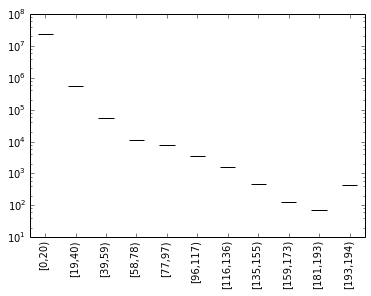

In [17]:
plot_2012 = result.freq.plot(kind='bar', logy = True)
plot_2012.set_xticklabels(result.range);

In [18]:
result

,bucket,range,freq
0,1,"[0,20)",23499405
1,2,"[19,40)",546635
2,3,"[39,59)",53473
3,4,"[58,78)",11509
4,5,"[77,97)",7844
5,6,"[96,117)",3444
6,7,"[116,136)",1598
7,8,"[135,155)",458
8,9,"[159,173)",130
9,10,"[181,193)",71
